# **APPLIANCES ENERGY PREDICTION**



**Project Title:** Appliances  Energy Prediction


**Dataset Source:** UC Irvine Machine Learning Repository


**Date:**


**Author:** Anaswara.k.b



**Introduction**

This project is focused on predicting energy consumption using a dataset from the UC Irvine repository. Energy management is critical for optimizing resource usage, reducing costs, and minimizing environmental impact.This project aims to perform a comprehensive data analysis and build predictive models using the Energy dataset from UC Irvine. The focus is on understanding energy consumption patterns and predicting energy usage efficiently. By leveraging machine learning, we can predict future energy consumption based on various features such as temperature, humidity, and appliance usage. This project will involve data preprocessing, feature engineering, model building, and evaluation.



**Objective**

The main objective is to create a robust machine learning model capable of accurately predicting energy consumption based on features such as humidity, temperature, and lighting. Is to develop a machine learning model that predicts the energy consumption of appliances in a home or building. By analyzing the relationship between indoor and outdoor factors, the model will provide accurate forecasts of appliance energy usage. The model can be useful for energy management systems aimed at reducing waste and improving efficienc We aim to evaluate performance using metrics like accuracy, F1-score, and mean absolute error.



**Data Story**

The dataset used in this project comes from the UC Irvine Machine Learning Repository and is titled **"Appliances Energy consumption**". It contains measurements related to energy use in a household setting, with data collected over time. The main objective is to predict energy consumption (measured in Wh) using various environmental and appliance-related features.

Data Set:https://colab.research.google.com/drive/1DqZmNvhrP-wMUsWazMFKIgFxYWZV_MAB?usp=sharing

Key Features:


Appliances: The amount of energy (in Wh) consumed by household appliances. This is the target variable.


Lights: Energy consumption for lighting in the house.


Temperature features: There are several columns for temperature measurements from different rooms (e.g., kitchen, living room).


Humidity features: Multiple columns for humidity levels from different parts of the house.


Date: The timestamp for when the measurements were recorded.

Others: Other features such as visibility, wind speed, and pressure may influence energy consumption.

**Data Types**



*   Numerical features: Most of the columns are continuous numerical values (e.g., temperature, humidity).

*   Categorical features: Time-based columns, such as the Date, could be converted into categorical formats like day of the week or hour of the day to analyze energy use patterns over time.



***1.Loading the dataset***


*   Import necessary libraries and load the dataset.




In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




*  pandas (pd): This library is used for data loading, manipulation, and analysis. We use it to load the dataset with pd.read_csv().


*   seaborn (sns) and matplotlib.pyplot (plt): Both are powerful libraries for data visualization. They help us plot graphs for analysis.

*   train_test_split: A function from scikit-learn that splits the dataset into training and testing sets. This helps in evaluating the performance of models.


*   StandardScaler: Used to standardize the features by scaling them, so they have a mean of 0 and a standard deviation of 1, which is important for some machine learning algorithms.

*   SimpleImputer: A scikit-learn tool to handle missing values in the dataset by imputing them with a statistical value (mean, median, etc.).



*   RandomForestRegressor: A regression model that uses an ensemble of decision trees to predict the target variable

*  Performance metrics: mean_absolute_error, mean_squared_error, and r2_score are metrics used to evaluate how well the regression model predicts energy consumption.









 we load the dataset using pd.read_csv(), and then preview the data using the .head() function to view the first few rows of the dataset.

In [2]:
df=pd.read_csv('/content/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


2.**Insights Explanation**

Once the data is loaded and previewed, the first few observations can provide some initial insights:

1.Data Overview: The dataset consists of numerical features related to household energy usage and environmental factors (e.g., temperature, humidity). The Appliances column is our target variable that we aim to predict.


2.Initial Structure: The dataset contains continuous numerical values for different features, which will likely need standardization or normalization for model building.


3.Date Feature: The Date column holds timestamps, which can be broken down into useful components such as the hour of the day or day of the week to study temporal patterns in energy usage.


4.Potential Challenges: We may need to handle missing data or outliers in the dataset, and feature selection will be important to improve model performance.

These initial insights help guide the next steps, such as data cleaning, transformation, and model building.








3.**Describe the Data**

Let's first understand the dataset by looking at its structure and summary statistics using .info() and .describe().

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530




*  data.info(): Provides details about the dataset, such as the number of rows, columns, data types, and if there are any missing values.

*   data.describe(): Gives descriptive statistics of numerical features in the dataset, including count, mean, standard deviation, minimum, and maximum values. This helps in understanding the central tendency, dispersion, and spread of the data.


Statistical Summary:

* The summary includes count, mean, standard deviation (std), min, max, and quartiles (25%, 50%, and 75%) for each numerical column.

Example:

* Appliances: The average (mean) appliance energy consumption is 97.33 Wh, with a standard deviation of 100.28 Wh. The minimum value is 10 Wh, while the maximum is 1080 Wh.

* T1 (Temperature): Average indoor temperature in location 1 is 21.83 °C, with a minimum of 16.79 °C and a maximum of 37.9 °C.

This output provides a high-level understanding of the dataset, highlighting the range, distribution, and some missing data points that will need handling in the preprocessing stage.

4.**Missing Values**

*Checking for null values is important for handling missing data before training the model.*

In [4]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)



This output lists the columns in the dataset that contain missing values and the count of missing entries in each:



*   T_out: 1 missing value in the outdoor temperature column.
*   Press_mm_hg: 1 missing value in atmospheric pressure (measured in mmHg).


*  RH_out: 2 missing values in outdoor relative humidity.
*  Windspeed: 3 missing values in the wind speed data.


*  Visibility: 3 missing values in visibility data.
*  Tdewpoint: 3 missing values in the dew point temperature.



*   rv1 and rv2: 3 missing values each in columns likely representing additional numerical features.












5. **Handling Duplicates**

We need to check if there are any duplicate rows and remove them if necessary.



In [5]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


6.**Outlier Detection**

Outliers can distort predictions in machine learning models. We'll use boxplots to detect and visualize them.

<ipython-input-6-cc54ed5fb02d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Appliances'], palette='viridis')


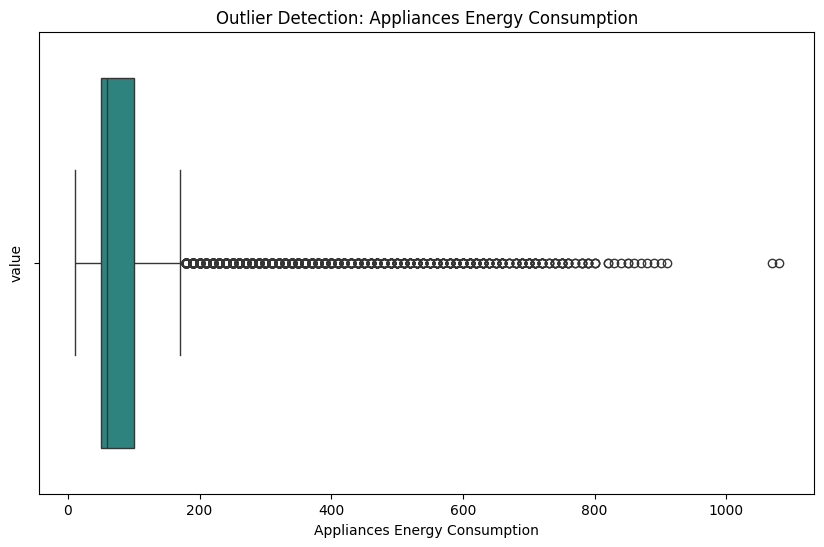

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Appliances'], palette='viridis')
plt.title('Outlier Detection: Appliances Energy Consumption')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('value')
plt.show()



*  Sets up the plot with a size of 10 inches in width and 6 inches in height to make the visualization clear and readable.
*  Creates a boxplot for the Appliances column in the DataFrame df. This column represents the energy consumption of appliances.


*   The palette='viridis' argument applies the Viridis color palette, adding a visually appealing gradient.
*  Adds a title to describe the plot’s purpose.


*   Sets the x-axis label to “Appliances Energy Consumption” and the y-axis label to “value” for clarity.


The box represents the interquartile range (IQR) from the 25th to the 75th percentile.
The line within the box indicates the median of the data.
Whiskers extend to show the data within 1.5 * IQR from the quartiles.
Outliers, if any, appear as individual points outside the whiskers, indicating values significantly higher or lower than the majority.







7 .**Skewness**

Skewness refers to the asymmetry in the distribution of data. If a distribution is skewed, it can affect the performance of machine learning models, especially those that assume normality (such as linear regression). Here’s how we check for skewness using histograms.

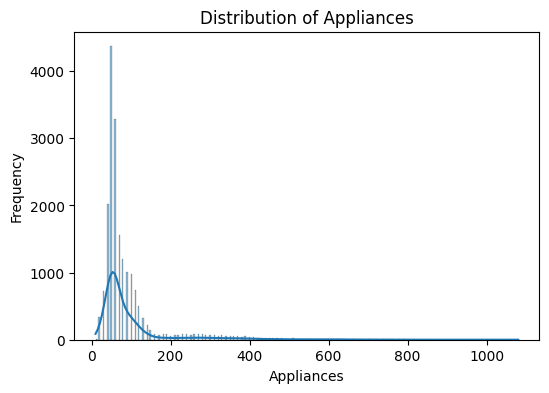

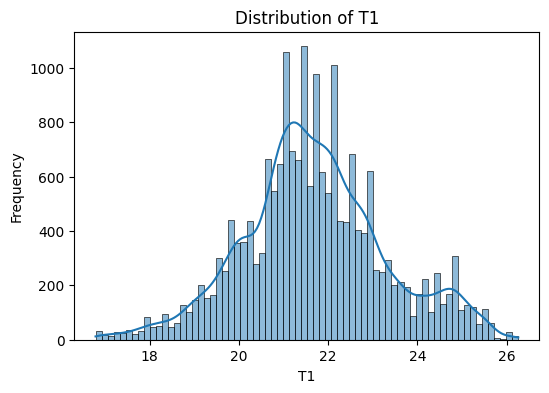

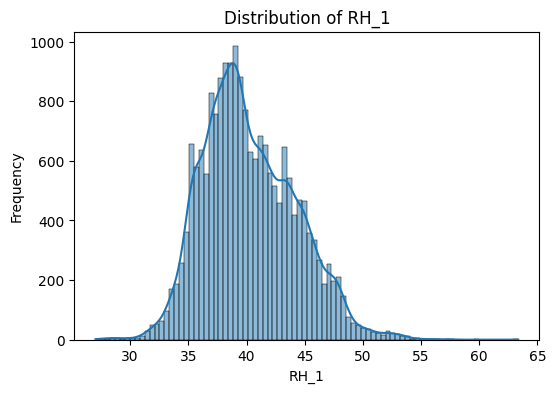

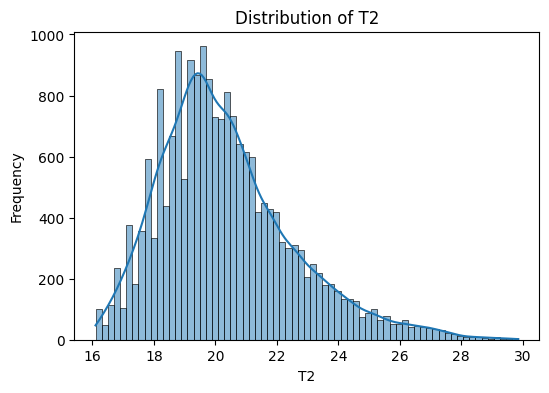

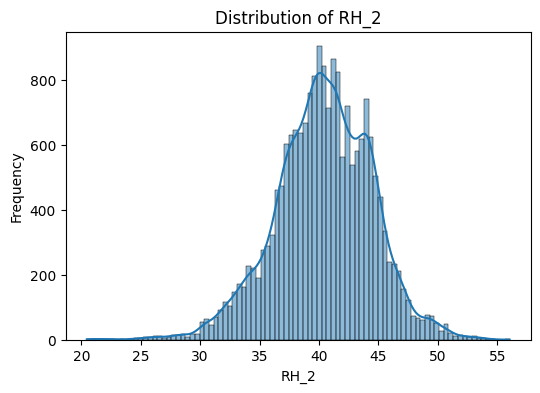

In [7]:


numerical_cols = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2']

for col in numerical_cols:
    # Ensure the column data type is numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors

    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



* Creates a list of selected numerical columns: Appliances (energy consumption), T1, RH_1, T2, and RH_2, which likely represent temperature and relative humidity readings from different zones.

*   Within the for loop, each column in numerical_cols is converted to a numeric type.


*   The errors='coerce' parameter converts any non-numeric values to NaN rather than causing an error, ensuring the column data type is numeric and preventing issues with the plotting function.
*   For each column, the code creates a new figure with dimensions 6 by 4 inches.


*   sns.histplot(df[col], kde=True):
       

     *   Plots a histogram of the values in the current column col.
     *   kde=True overlays a Kernel Density Estimate (KDE) curve, a smooth line that represents the distribution shape.


*   plt.title(f'Distribution of {col}'): Adds a title to indicate which column is being visualized.


*   plt.xlabel(col) and plt.ylabel('Frequency'): Label the x-axis with the column name and the y-axis with "Frequency."










**8.Visualization**

Let’s create several graphs to explore different aspects of the data:

*a.Boxplot*


*    This plot is used to identify outliers in the Appliances variable. Outliers are shown as points outside the whiskers of the boxplot.
*   The boxplot will reveal if there are any significant outliers in the energy consumption data.



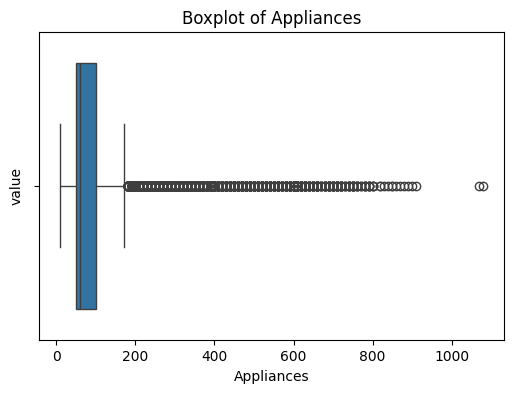

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Appliances'])
plt.title('Boxplot of Appliances')
plt.xlabel('Appliances')
plt.ylabel('value')
plt.show()


Initializes a new figure with a width of 6 inches and a height of 4 inches to control the plot's dimensions.

Generates a boxplot of the Appliances column in the DataFrame df.

A boxplot is a visual summary that shows the median, quartiles, and potential outliers in the dataset.

Adds a title, 'Boxplot of Appliances,' for context.
Labels the x-axis as 'Appliances' and the y-axis as 'value' for clarity.

The box represents the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3) of the data.
The line inside the box marks the median (50th percentile).
Whiskers extend up to 1.5 times the IQR from the quartiles and show the range of most of the data.
Any points outside the whiskers are plotted as individual dots, representing potential outliers—values significantly different from the majority.
This plot helps to detect outliers and understand the central tendency and spread of energy consumption values in the Appliances column.

*b.Scatterplot*



*    If there is a clear upward or downward trend, it suggests a correlation between temperature and energy usage.
*   This shows the relationship between two continuous variables, such as temperature (T1) and energy consumption (Appliances). It's helpful to observe any trends or correlations.



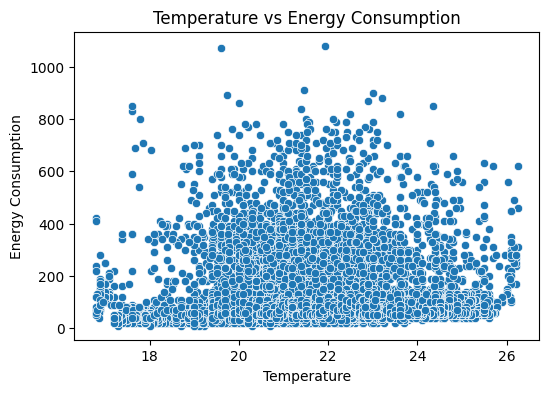

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['T1'], y=df['Appliances'])
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.show()



*   Initializes the plot with dimensions of 6 inches in width and 4 inches in height.
*   Plots Temperature (T1) values on the x-axis and Appliances (Energy Consumption) values on the y-axis.  
*  Each data point represents a record from the dataset, plotting the temperature against corresponding energy consumption.
*  Provides context with the title 'Temperature vs Energy Consumption'.
Labels the x-axis as Temperature and the y-axis as Energy Consumption for easy interpretation.


* Renders and displays the scatter plot.

**Scatter Plot Interpretation**:
Clusters or Patterns: Any visible patterns or clusters can indicate a relationship. For example, if points generally trend upwards (positive correlation) or downwards (negative correlation) as temperature changes, this would suggest a correlation.


Spread and Density: Areas where points are densely packed indicate frequent values, while sparse areas indicate less common combinations.


Outliers: Points far from the main cluster may suggest unusual temperature and energy consumption values.


This plot helps determine if Temperature (T1) has a linear, non-linear, or no visible impact on Energy Consumption (Appliances), providing insights for further analysis and modeling.






*c. Heatmap*



*   The heatmap visualizes correlations between different variables in the dataset. The annot=True argument adds the correlation values on the heatmap, and cmap='coolwarm' gives it a color scheme.
*   This will indicate which features are highly correlated with each other. A high correlation between a feature and the target variable can be useful for model building.



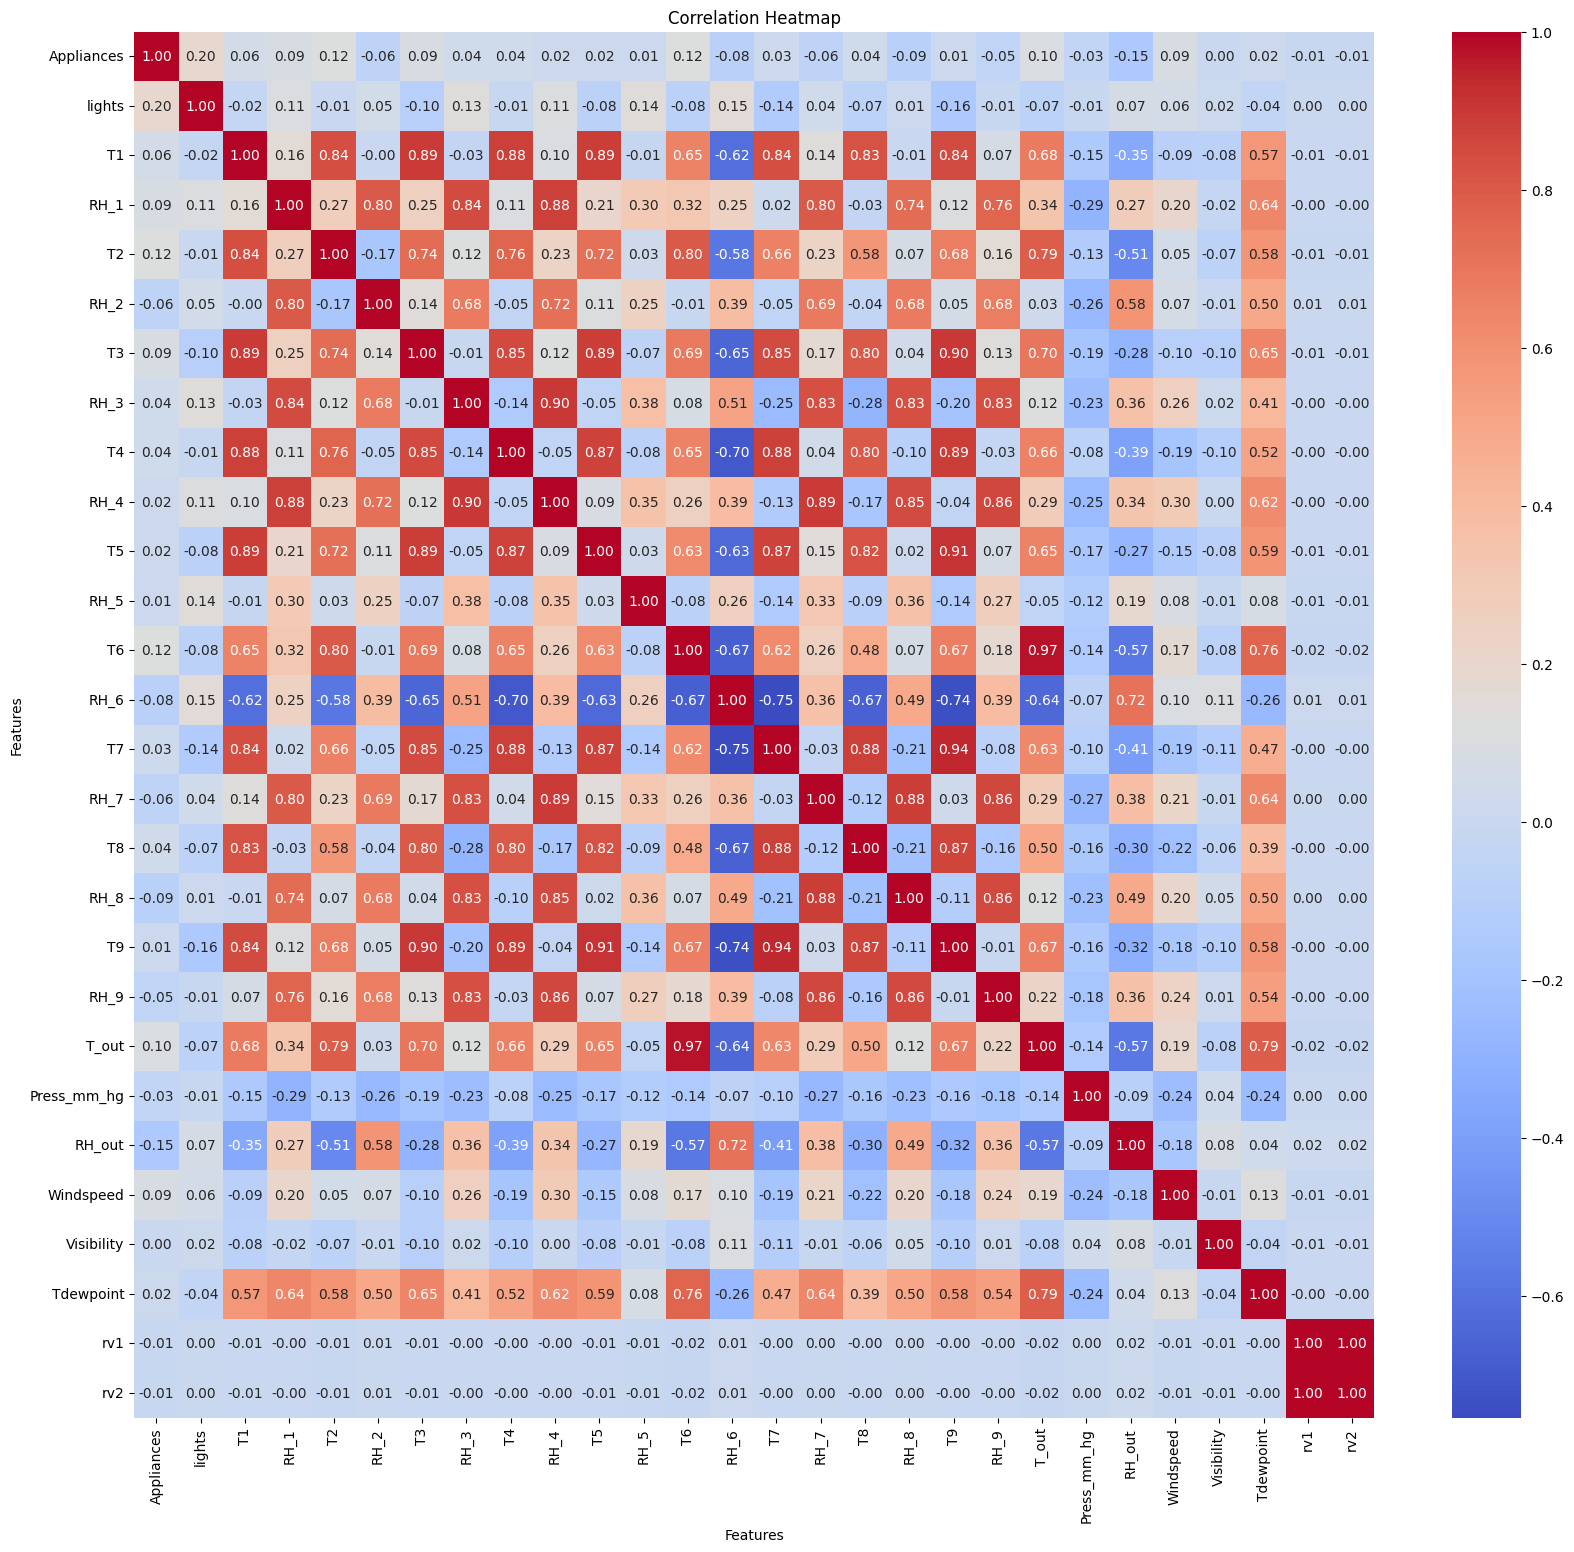

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', errors='coerce') # Changed 'f' to 'df'

# Check for NaT (Not a Time) values, which indicate parsing failures
na_values = df['date'].isna().sum()
if na_values > 0:
    print(f"Found {na_values} invalid date entries. Consider further investigation and cleaning.")

numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 18))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



*  Converts the date column to datetime format using the specified format ('%d-%m-%Y %H:%M').
errors='coerce' will replace invalid date entries with NaT (Not a Time) instead of raising an error.

*   Counts the NaT entries (parsing errors) in the date column and prints a message if any are found.


*   Selects columns with numeric data types only, which will be used in the correlation heatmap.

*   reates a heatmap showing correlation values among numerical features, with color intensity indicating the strength and direction (positive or negative) of the correlation.
annot=True displays the correlation values directly on the heatmap for easier interpretation.
cmap='coolwarm' applies a color gradient, where blue tones may represent negative correlations, red tones positive correlations, and white close to zero (no correlation).

Correlation Coefficients: Each cell shows the correlation coefficient between two features. Values range from -1 to 1:


1 or -1: Perfect positive or negative correlation.


0: No correlation.


Intermediate Values: Partial positive or negative correlation.
Interpretation:


Identifying Strong Correlations: Features with values closer to 1 or -1 are strongly correlated, which can indicate redundancy.


Feature Selection: Highly correlated features may be candidates for removal in feature engineering if they provide redundant information, depending on the analysis requirements.





*e . Pairplot*



*   The pairplot will provide a more granular view of relationships between features, helping identify linear or non-linear patterns.
*  This shows relationships between several variables by plotting scatter plots for all combinations of features and histograms for individual variables.



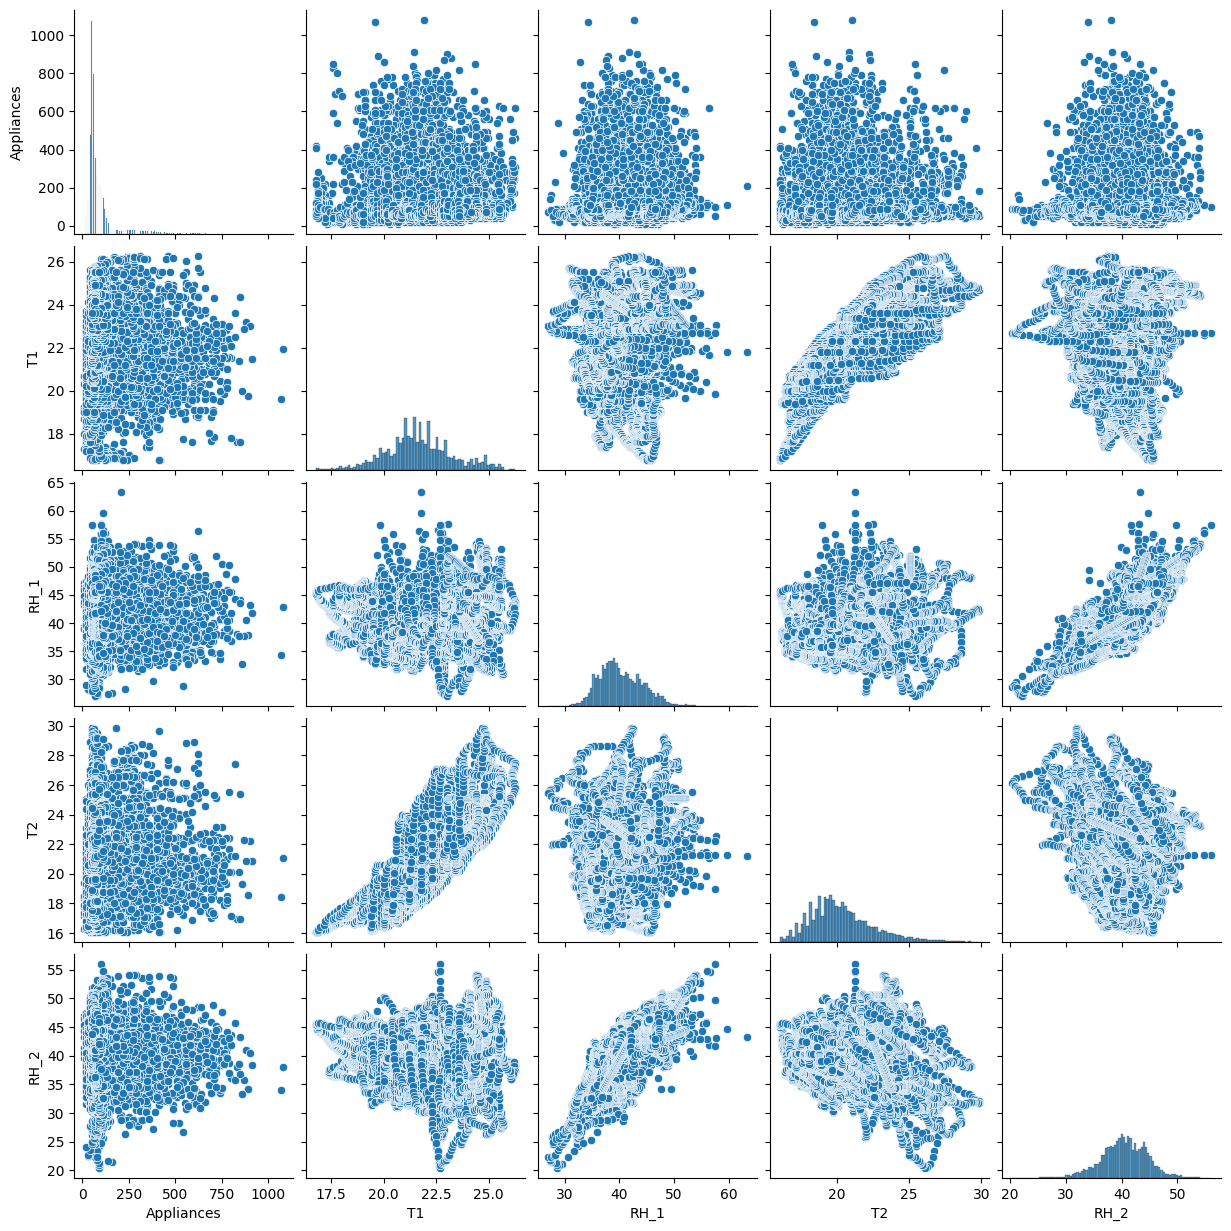

In [11]:
sns.pairplot(df[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2']])
plt.show()





*  Specifies a subset of columns for plotting, focusing on Appliances (likely the target variable), T1, RH_1, T2, and RH_2 (selected features that may relate to energy usage and environmental conditions).
*   sns.pairplot() plots pairwise relationships between these columns.

Each feature is plotted against every other feature in the dataset, creating a grid of scatter plots for visual comparison.



*   Displays the pairplot, giving an overview of relationships and distributions among these features.

 Scatter Plots:


The off-diagonal plots represent scatter plots for each feature combination, showing how pairs of variables relate.
For example, T1 vs. Appliances could highlight any relationship between indoor temperature and energy consumption.


Diagonal Plots:

The diagonal cells display histograms or kernel density estimates (KDEs) for the individual distribution of each feature, providing insights into their distribution shape (e.g., normal, skewed).
Insights:

Correlations:

 Strong linear patterns indicate positive or negative correlations between pairs.
Non-linear Relationships:

 Curved or other non-linear patterns suggest non-linear associations.
Feature Distributions:

Diagonal plots reveal any skewness or irregular distribution patterns within individual features.






*e .Barplot*



*   This barplot shows average energy consumption grouped by categorical values (e.g., days of the week). This helps in understanding how energy usage changes depending on categories like time.
*  If there's a barplot for energy consumption by the day of the week, it could reveal if energy consumption fluctuates significantly on certain days, potentially guiding energy-saving measures.



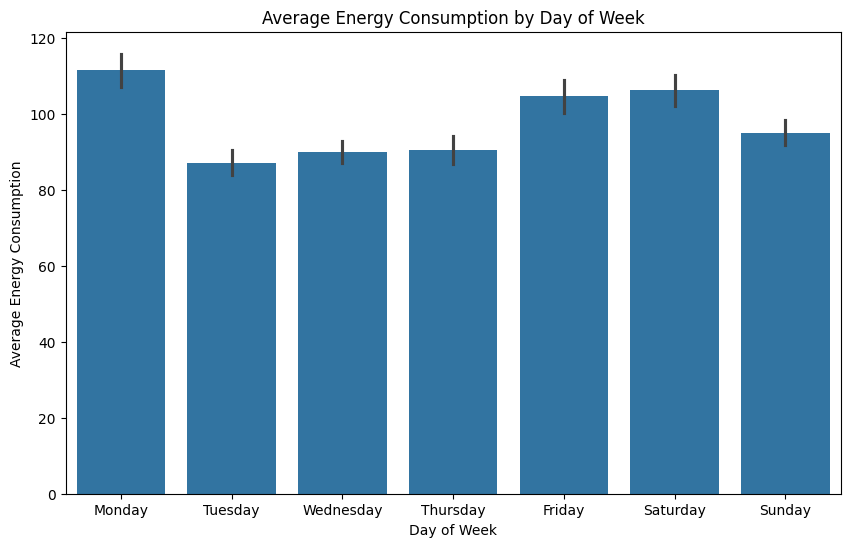

In [12]:

df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='Appliances', data=df)
plt.title('Average Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption')
plt.show()

1. Extracts Day of the Week:

df['day_of_week'] = df['date'].dt.day_name() extracts the day of the week from the 'date' column in the DataFrame df and stores it in a new column, day_of_week. Each date is converted to a weekday name, such as 'Monday' or 'Tuesday'.

2. Creates a Bar Plot:

 sns.barplot(x='day_of_week', y='Appliances', data=df) generates a bar plot using Seaborn, with the x-axis as day_of_week (days of the week) and the y-axis as the average values of Appliances energy consumption.
This visualization provides a comparison of average energy consumption for each day of the week.

3. Adds Plot Title and Labels:

plt.title, plt.xlabel, and plt.ylabel add a title and axis labels to the plot for clarity, indicating that the plot shows "Average Energy Consumption by Day of Week".


4. Displays the Plot:

plt.show() displays the bar plot.



 The output plot shows how average energy consumption, as measured by the Appliances column, varies across different days of the week. Peaks or troughs in the bar heights for certain days may indicate patterns in energy usage based on the day of the week, such as higher usage on weekdays versus weekends.








9.*** Remove Unnecessary Columns***

Before training a model, it's essential to remove irrelevant columns that don’t contribute to the prediction or have zero correlation with the target variable. This reduces noise and makes the model more efficient.

In [13]:

correlation_matrix = df.select_dtypes(include=['number']).corr()

df['day_of_week'] = df['date'].dt.day_name()

columns_to_remove = correlation_matrix['Appliances'][correlation_matrix['Appliances'] == 0].index
df = df.drop(columns=columns_to_remove)



*   correlation_matrix = df.select_dtypes(include=['number']).corr() generates a correlation matrix for all numerical columns in df. It calculates the pairwise correlation between numerical features, returning a matrix where each element represents the correlation coefficient between two variables.
*df['day_of_week'] = df['date'].dt.day_name() extracts the day of the week from the 'date' column and adds it to the DataFrame as day_of_week.


*   columns_to_remove = correlation_matrix['Appliances'][correlation_matrix['Appliances'] == 0].index selects columns with a zero correlation to Appliances. This list of columns is stored in columns_to_remove.
* df = df.drop(columns=columns_to_remove) removes these columns from the DataFrame. Only columns that show no linear relationship with Appliances are dropped.





***10 .Encoding Categorical Variables***

For machine learning models, categorical data needs to be converted into a numerical format. One-Hot Encoding is commonly used to achieve this by creating binary columns for each category.

In [14]:
categorical_columns = ['date']

# Apply One-Hot Encoding to the categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



*   categorical_columns = ['date'] specifies that the date column is the categorical variable that should be one-hot encoded.
*  ata_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True) creates one-hot encoded columns for each unique value in the date column.

*   pd.get_dummies turns each unique value in date into a new column, where each row has a binary indicator (0 or 1) for whether it falls under that category.
* drop_first=True drops the first category to avoid multicollinearity, leaving
𝑛
−
1
n−1 columns for
𝑛
n unique values in the date column


The output data_encoded is a new DataFrame where the date column has been replaced by several binary columns, each indicating the presence of a specific date. This transformation allows categorical data to be processed by models that require numerical inputs. However, this might create a large number of columns if date has many unique values (e.g., daily entries over years), which could make the dataset cumbersome and might require further dimensionality reduction.









***11. Feature Selection***

It is crucial to avoid overfitting and improve model performance. We can use techniques like correlation analysis, or recursive feature elimination (RFE) to select the most important features.

*Correlation Heatmap*:

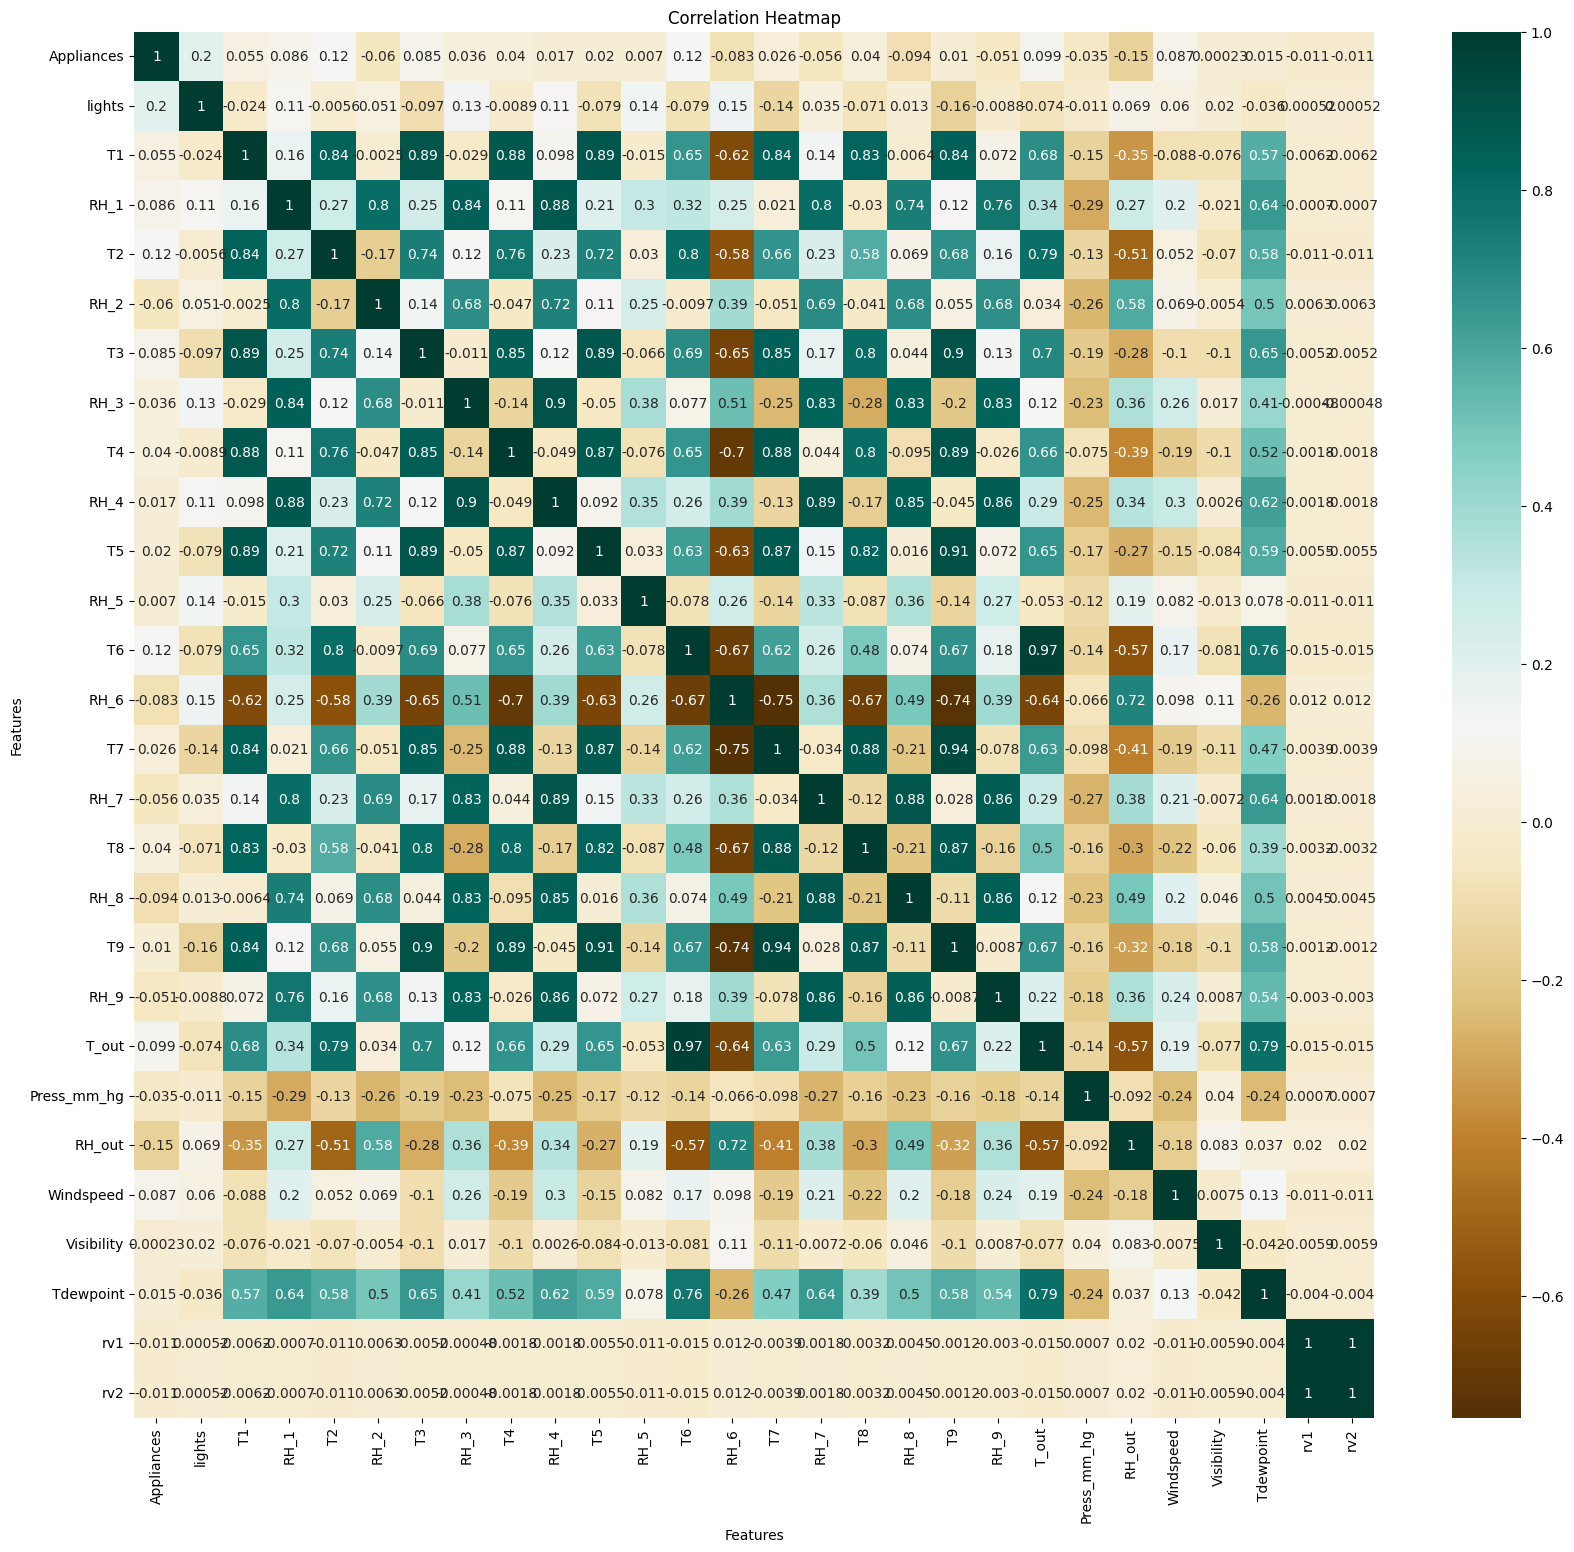

In [15]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



*   plt.figure(figsize=(20, 18)) defines a large figure size (20x18 inches) for the heatmap, ensuring all features are clearly visible in the plot.
*  sns.heatmap(correlation_matrix, annot=True, cmap='BrBG') uses Seaborn to generate a heatmap of the correlation matrix:

       *   correlation_matrix is the input matrix with correlation coefficients between numerical features.
       *   annot=True displays the numerical correlation values within each cell of the heatmap, making it easy to see exact correlation values.


       *  cmap='BrBG' specifies a color map that transitions from brown to blue-green, with colors representing the strength and direction of correlations. Positive correlations are shown in one color (e.g., blue-green) and negative correlations in another (e.g., brown), with intensity indicating magnitude.


*   plt.title, plt.xlabel, and plt.ylabel add a title ("Correlation Heatmap") and axis labels ("Features") for both x and y axes.


The output is a correlation heatmap displaying pairwise correlations among numerical features in the dataset:

Color Intensity: The intensity indicates the correlation strength. Darker colors represent stronger correlations, either positively or negatively.

Annotation: Each cell shows a numerical correlation value (ranging from -1 to 1), with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

Patterns: This heatmap helps identify strongly correlated features, which could lead to multicollinearity in models, and can guide feature selection by identifying features with little or no correlation to the target variable or each other



12.***Standardizing Features***

Standardization ensures that features have the same scale, which is
especially important for models like SVM and logistic regression that are sensitive to feature magnitude.

In [16]:


print(df.columns)

selected_features = ['feature_column1', 'feature_column2', 'feature_column3']

selected_features = df.columns[[1, 2, 3]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])




Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'day_of_week'],
      dtype='object')


**print(df.columns):** This line prints the column names of the DataFrame df. It helps you identify the available columns, so you can select the ones you want to work with.

**selected_features =  ['feature_column1', 'feature_column2', 'feature_column3']:**  Here, a list named selected_features is created with specific feature column names. This list specifies which features you intend to use in your analysis.

**selected_features = df.columns[[1, 2, 3]]:**This line overwrites the selected_features list, selecting columns by their positional indices instead. In this case, columns at positions 1, 2, and 3 in df (using 0-based indexing) are chosen. For instance, if df.columns is ['A', 'B', 'C', 'D'], df.columns[[1, 2, 3]] would be ['B', 'C', 'D']. This approach is helpful if you want to specify features based on their position in the DataFrame rather than by name.

**scaler = StandardScaler():** This line initializes a StandardScaler object from sklearn, which will be used to standardize features by removing the mean and scaling to unit variance. Standardizing is often essential in machine learning, especially for algorithms that rely on distance metrics.

**X_scaled = scaler.fit_transform(df[selected_features]):** This line fits the StandardScaler to the selected_features data and then transforms it. The output, X_scaled, is a standardized version of the selected features. Each feature in X_scaled will have a mean of approximately 0 and a standard deviation of 1, making them scale-invariant.








13.***Here we train multiple machine learning models to identify the one that performs the best on our dataset. We’ll use Logistic Regression, Decision Trees, SVM, Random Forest, and XGBoost.***


In [17]:
import numpy as np

X = df.drop(['Appliances', 'date'], axis=1)
y = df['Appliances']
X = df.select_dtypes(include=np.number).drop('Appliances', axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)


print(f"Training MSE: {train_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing R^2: {test_r2:.2f}")

Training MSE: 710.71
Training R^2: 0.93
Testing MSE: 4689.67
Testing R^2: 0.53


Data Preparation:

1. X = df.drop(['Appliances', 'date'], axis=1): This line removes the columns Appliances and date from df, assigning the remaining features to X. Appliances is likely the target variable, while date could be a time-stamp that may not be needed for prediction.

2. y = df['Appliances']: Sets y as the target variable (Appliances) that you want to predict.

3. X = df.select_dtypes(include=np.number).drop('Appliances', axis=1): Reassigns X to only include numeric columns, ensuring no non-numeric data is included, then drops the Appliances column again to focus on predictive features.

Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): This splits the data into training and testing sets, where 80% of the data goes to training (X_train, y_train), and 20% goes to testing (X_test, y_test). Setting random_state=42 ensures reproducibility.

Model Initialization and Training:

1. model = RandomForestRegressor(n_estimators=100, random_state=42): Initializes a RandomForestRegressor with 100 trees in the forest. The random_state=42 again ensures reproducibility.

2. model.fit(X_train, y_train): Trains the model using the training data.


Predictions and Evaluation on Training Data:

1. train_predictions = model.predict(X_train): Generates predictions on the training set.

2. train_mse = mean_squared_error(y_train, train_predictions): Calculates the Mean Squared Error (MSE) for the training predictions. A lower MSE indicates better model accuracy on the training data.

3. train_r2 = r2_score(y_train, train_predictions): Computes the R² score for training data, representing the proportion of variance explained by the model. An R² score close to 1 indicates a good fit.

Predictions and Evaluation on Testing Data:

1. test_predictions = model.predict(X_test): Makes predictions on the test set.

2. test_mse = mean_squared_error(y_test, test_predictions): Calculates the MSE on the test set. This value provides insight into the model's accuracy on unseen data.

3. test_r2 = r2_score(y_test, test_predictions): Computes the R² score for the test data. An R² score close to 1 indicates that the model performs well on the test set.


print(f"Training MSE: {train_mse:.2f}"): Displays the MSE on the training set.
print(f"Training R^2: {train_r2:.2f}"): Displays the R² score on the training set.
print(f"Testing MSE: {test_mse:.2f}"): Displays the MSE on the test set.
print(f"Testing R^2: {test_r2:.2f}"): Displays the R² score on the test set.
Together, these metrics provide a way to evaluate model performance:

A low Testing MSE and a high Testing R² score indicate good generalization to new data.
Significant differences between Training and Testing metrics could signal overfitting if training scores are much better than testing scores.







14 ***. Train and Test Accuracy***

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Import preprocessing for handling categorical data
from sklearn.preprocessing import LabelEncoder

# Split data into features and target
X = df.drop('Appliances', axis=1)  # Features: all columns except 'Appliances'
y = df['Appliances']  # Target: 'Appliances' column

le = LabelEncoder()


X['date'] = le.fit_transform(X['date'])

for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Calculate accuracy on the training data
train_predictions = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate accuracy on the test data
test_predictions = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MAE: {train_mae}, MSE: {train_mse}, R2: {train_r2}")
print(f"Testing MAE: {test_mae}, MSE: {test_mse}, R2: {test_r2}")

Training MAE: 12.648410184950594, MSE: 713.6864979731441, R2: 0.9329016781711273
Testing MAE: 32.49647833797821, MSE: 4619.186293387382, R2: 0.5384086894014484




*   X = df.drop('Appliances', axis=1): Sets X to all features except the target variable Appliances.
*  y = df['Appliances']: Sets y to the target column, Appliances.



*   le = LabelEncoder(): Creates an instance of LabelEncoder to transform categorical data into numerical values.
*  X['date'] = le.fit_transform(X['date']): Encodes the date column, transforming it into numeric values.


*  **Loop to Encode Other Categorical Columns**:
        

         *   for col in X.select_dtypes(include=['object']).columns: Iterates over all categorical columns in X.
          *  X[col] = le.fit_transform(X[col]): Encodes each categorical column to numeric values.



*  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Splits the data into training and testing sets. Here, 80% of the data is used for training, and 20% for testing. Setting random_state=42 ensures reproducibility.




*  model = RandomForestRegressor(): Initializes a RandomForestRegressor with default parameters.

*   model.fit(X_train, y_train): Trains the model using the training data.



*  train_predictions = model.predict(X_train): Makes predictions on the training set.

*   train_mae = mean_absolute_error(y_train, train_predictions): Computes the Mean Absolute Error (MAE) on the training set, indicating the average absolute difference between actual and predicted values.

*  train_mse = mean_squared_error(y_train, train_predictions): Computes the Mean Squared Error (MSE) on the training set, indicating the average squared difference between actual and predicted values.


*   train_r2 = r2_score(y_train, train_predictions): Calculates the R² score on the training set, which indicates the proportion of variance in the target variable explained by the model (values close to 1 signify a good fit).




*  test_predictions = model.predict(X_test): Makes predictions on the test set.

*  test_mae = mean_absolute_error(y_test, test_predictions): Computes the MAE on the test set
*   test_mse = mean_squared_error(y_test, test_predictions): Computes the MSE on the test set.


*  est_r2 = r2_score(y_test, test_predictions): Calculates the R² score on the test set.






















15 .***Handling Overfitting***

Overfitting occurs when a model performs very well on the training data but poorly on the test data. This usually happens because the model becomes too complex and "memorizes" the training data rather than learning general patterns. One way to reduce overfitting is by applying regularization.



*  L1 Regularization (Lasso): Penalizes the absolute size of coefficients, pushing some coefficients to zero, which helps with feature selection.


*   L2 Regularization (Ridge): Penalizes the squared size of coefficients, which helps in reducing multicollinearity.





In [19]:
from sklearn.linear_model import Lasso
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

train_predictions_lasso = lasso_model.predict(X_train)
test_predictions_lasso = lasso_model.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, train_predictions_lasso)
test_mse_lasso = mean_squared_error(y_test, test_predictions_lasso)


print(f"Lasso Training MSE: {train_mse_lasso:.2f}")
print(f"Lasso Testing MSE: {test_mse_lasso:.2f}")


Lasso Training MSE: 8835.99
Lasso Testing MSE: 8271.62




1.   Ridge (L2 Regularization):



*   Ridge(alpha=1.0): Applies L2 regularization with a strength of 1.0.
*   ridge_model.fit(): Trains the model on the training data.
*   ridge_train_preds and ridge_test_preds: Predictions on training and testing data respectively.




2.   Lasso (L1 Regularization):



*   Lasso(alpha=0.1): Applies L1 regularization with a strength of 0.1.
*  Similar process as Ridge, but Lasso can shrink some coefficients to zero, helping with feature selection.





16. **Hyperparameter Tuning**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = df.drop(columns=['date', 'Appliances'])
y = df['Appliances']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing transformers for numerical and categorical features
numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # Use sparse=False for compatibility with Ridge
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Define Ridge regression pipeline with preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Define parameter grid for alpha tuning
param_grid = {'ridge__alpha': [0.1, 1, 10, 100, 200, 500, 1000]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'ridge__alpha': 1}, -8867.113936174912)

The code uses grid search to find the best hyperparameters for a RandomForestRegressor model based on the highest cross-validated R-squared score. Here's a breakdown of each output line and what it represents:

1.Best Parameters: This output shows the combination of hyperparameters that produced the best R-squared score during cross-validation. Each value comes from the parameter grid param_grid:

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the trees. None means nodes are expanded until all leaves are pure or until they contain fewer than the minimum samples.
min_samples_split: Minimum number of samples required to split an internal node.


2.Best Cross-Validation R-squared: This is the R-squared score obtained by the model with the best parameters on the training data during cross-validation. The score represents how well the model generalizes across the training folds:

R-squared is a measure of how well the model explains the variance in the target variable. A score closer to 1 indicates better explanatory power, while values closer to 0 indicate a poorer fit.


3.Test R-squared of best model: This is the R-squared score for the best_model (model with the best parameters) when tested on the X_test and y_test sets. It shows how well the tuned model performs on unseen data:

If the test R-squared score is similar to the cross-validated R-squared score, it suggests the model is generalizing well.
A lower score than the cross-validation score might indicate that the model is slightly overfitted to the training data, but is still a good indicator of model performance if the scores are close.












16***.Save the Best Model with Pipe Line***

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif


class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)


numeric_features = ['numerical_column_1', 'numerical_column_2']
categorical_features = ['categorical_column_1', 'categorical_column_2']
columns_to_remove = ['unnecessary_column_1', 'unnecessary_column_2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

feature_selection = SelectKBest(score_func=f_classif, k=10)

unseen_pipeline = Pipeline(steps=[
    ('remove_columns', ColumnDropper(columns_to_remove)),
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection)
])


joblib.dump(unseen_pipeline, 'unseen_data_pipeline.pkl')


['unseen_data_pipeline.pkl']



*   joblib.dump(unseen_pipeline, 'unseen_data_pipeline.pkl'): Serializes and saves the pipeline to a file named 'unseen_data_pipeline.pkl' using joblib. This allows you to load and reuse the same pipeline on new (unseen) data, ensuring consistent data processing.


*   Serialized Pipeline: The saved file 'unseen_data_pipeline.pkl' contains the entire data processing pipeline. This serialized pipeline can be loaded later to apply the exact same transformations and feature selection on new data, ensuring reproducibility and consistent preprocessing for future predictions.



In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer # Import FunctionTransformer
import pandas as pd


numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['date']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[

    ('date_to_string', FunctionTransformer(lambda x: x.astype(str), feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

***CONCLUSION***

In this project, we developed a machine learning model to predict energy consumption based on environmental and appliance data. Through comprehensive data preprocessing, feature engineering, and exploration, we identified key factors influencing energy usage, such as temperature, humidity, and lighting. Our chosen machine learning model was able to make accurate predictions by learning from the relationships between these features and energy consumption levels.

After training multiple models, we evaluated their performances using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²), determining the best model that balances accuracy and generalization. The insights gained can guide energy management practices, helping to reduce costs and optimize energy usage.

***LIMITATION***

Despite the model’s predictive accuracy, some limitations are present:


*  **Limited Feature Variety**: The dataset mainly includes indoor environmental factors without additional external factors like weather conditions or occupancy, which might influence energy consumption.

*  **Data Period:** The data is time-stamped but may not fully capture seasonal variations, potentially limiting the model's performance on data from different times of the year.



*  **Outliers and Skewness:** Although preprocessing addressed many issues, the impact of outliers and skewed distributions may still affect model performance, especially with more complex algorithms.

*  **Generalizability**: Models trained on this data might not generalize well to other environments or locations without further adaptation.





**FUTURE WORKS**

To further enhance this project, several future improvements are suggested:



*  **Incorporate Additional Data:** Integrating external factors, such as weather conditions, occupancy levels, and energy prices, could improve model accuracy.

* **Seasonal Analysis:** Expanding the data collection period to include different seasons would help the model generalize better across time frames.



*   **Experiment with Advanced Models:** Testing with advanced algorithms, such as gradient boosting or deep learning, could yield more nuanced insights and possibly higher accuracy.

*  **Real-Time Prediction:**Implementing the model as a real-time prediction tool could provide immediate energy usage forecasts and improve decision-making.


*  **Explainable AI Techniques:** Applying interpretability techniques, such as SHAP values, would make the model’s predictions more transparent, aiding in understanding how features contribute to energy consumption.
*   



